### objectives
In this lab, you will perform the following tasks: <br>
•Launch Dataflow and run a Dataflow job <br>
•Understand how data elements flow through the transformations of a Dataflow pipeline <br>
•Connect Dataflow to Pub/Sub and BigQuery <br>
•Observe and understand how Dataflow autoscaling adjusts compute resources to process input data optimally <br>
•Learn where to find logging information created by Dataflow <br>
•Explore metrics and create alerts and dashboards with Cloud Monitoring <br>

### Preparation
✓ Compute Engine > VM instances > training-vm > Connect <br>
In vm terminal write ls /training to Verify initialization <br>
✓ download a code repository <br>
git clone https://github.com/GoogleCloudPlatform/training-data-analyst <br>
✓ sets the DEVSHELL_PROJECT_ID and BUCKET environment variables 
source /training/project_env.sh <br>
✓ Create dataset Demo in bigquery <br>
✓ Cloud Storage Bucket <br>
Cloud Storage > Browser. With the following properties <br>
Name : project_id <br>
Default storage class : Regional <br>
Location : us-central1 <br>

### Simulate traffic sensor data into Pub/Sub
✓ In the training-vm SSH terminal, start the sensor simulator. The script reads sample data from a CSV 
file and publishes it to Pub/Sub. <br>
/training/sensor_magic.sh <br>
✓ Open a second SSH terminal and connect to the training VM <br>

### Launch Dataflow Pipeline

✓ Enable Dataflow API <br>
second training-vm SSH terminal. <br>
cd ~/training-data-analyst/courses/streaming/process/sandiego <br>
6.Identify the script that creates and runs the Dataflow pipeline. <br>
cat run_oncloud.sh <br>
7.Copy-and-paste the following URL into a new browser tab to view the source code on Github <br>
https://github.com/Googlestreaming/process/sandiego/run_oncloud.sh <br>
8.The script requires three arguments: project id, bucket name, classname
A 4th optional argument is options. The options argument discussed later in this lab. <br>
CloudPlatform/training-data-analyst/blob/master/courses/
|attribute|value|
|---|---|
|project id| your Project ID|
|bucket name |your Bucket Name|
|classname |java file that runs aggregations |
|options |options|

There are 4 java files that you can choose 
from for classname. Each reads the 
traffic data from Pub/Sub and runs 
different aggregations/computations <br>

9.Go into the java directory. Identify the source file AverageSpeeds.java.
cd ~/training-data-analyst/courses/streaming/process/sandiego/src/main/java/com/google/cloud/training/dataanalyst/sandiego <br>
cat AverageSpeeds.java <br>
10.Copy-and-paste the following URL into a browser tab to view the source code on Github. <br>

![link] (https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/courses/streaming/process/sandiego/src/main/java/com/google/cloud/training/dataanalyst/sandiego/AverageSpeeds.java)
11.Return to the training-vm SSH terminal. Run the Dataflow pipeline to read from PubSub and write into BigQuery.
cd ~/training-data-analyst/courses/streaming/process/sandiego
./run_oncloud.sh $DEVSHELL_PROJECT_ID $BUCKET AverageSpeeds
**don't forget to add the project id and bucket name**

### Explore the pipeline
✓ click Dataflow and click on your job to monitor progress.  <br>
✓ Pub/Sub > Topics examine topic sandiego <br>
✓ Dataflow > graph pipeline > GetMessages step <br>
▪ which corresponds to Pub/Sub messages that have been read. <br>
▪ Do you see a subscription created? <br>
▪ How does the code pull messages from Pub/Sub? <br>
✓ Dataflow > graph pipeline > Time Window step <br>
▪ What is the window interval? <br>
▪ How often is a new window created? <br>
✓ BySensor ,AvgBySensor , ToBQRow and BigQueryIO.Write <br>
✓ Go back to bigquery demos you find average_speeds table <br>

### Determine throughput rates
Dataflow >> GetMessages , Time Window <br>
•System Lag is an important metric for streaming pipelines. It represents the amount of time 
data elements are waiting to be processed since they "arrived" in the input of the 
transformation step. <br>
•Elements Added metric under output collections tells you how many data elements exited 
this step (for the Read PubSub Msg step of the pipeline it also represents the number of 
Pub/Sub messages read from the topic by the Pub/Sub IO connector) <br>

### Bigquery
```sql
SELECT *
FROM `demos.average_speeds`
ORDER BY timestamp DESC
LIMIT 100
Find the last update to the table by running the following SQL.
SELECT
MAX(timestamp)
FROM
`demos.average_speeds`
```

### Observe and understand autoscaling
Observe how Dataflow scales the number of workers to process the backlog of incoming Pub/Sub messages. <br>
Dataflow > JOB METRICS > Autoscaling > More history (monitor workers) > Worker pool (status) <br>

### Refresh the sensor data simulation script
✓ Interrupt training-vm SSH first terminal CRTL+C <br>
cd ~/training-data-analyst/courses/streaming/publish <br>
./send_sensor_data.py --speedFactor=60 --project $DEVSHELL_PROJECT_ID <br>
✓ open third vm terminal and write 
▪ source /training/project_env.sh # create environment variables <br>
▪ cd ~/training-data-analyst/courses/streaming/publish <br>
./send_sensor_data.py --speedFactor=60 --project $DEVSHELL_PROJECT_ID <br>

### Cloud Monitoring integration
Cloud Monitoring integration with Dataflow allows users to access Dataflow job metrics such as System Lag (for 
streaming jobs), Job Status (Failed, Successful), Element Counts, and User Counters from within Cloud Monitoring.  <br>
Integration features of Cloud Monitoring <br>
•Explore Dataflow Metrics: Browse through available Dataflow pipeline metrics and visualize them in charts.
Some common Dataflow metrics. <br>
|Metrics| Features|
|---|---|
|Job status| Job status (Failed, Successful), reported as an enum every 30secs and on update.|
|Elapsed time| Job elapsed time (measured in seconds), reported every 30 secs.|
|System lag |Max lag across the entire pipeline, reported in seconds.|
|Current vCPU count |Current # of virtual CPUs used by job and updated on value change.|
|Estimated byte count| Number of bytes processed per PCollection|

•Chart Dataflow metrics in Monitoring Dashboards: Create Dashboards and 
chart time series of Dataflow metrics. <br>
•Configure Alerts: Define thresholds on job or resource group-level metrics and 
alert when these metrics reach specified values. Monitoring alert can notify on 
a variety of conditions such as long streaming system lag or failed jobs. <br>
•Monitor User-Defined Metrics: In addition to Dataflow metrics, Dataflow 
exposes user-defined metrics (SDK Aggregators) as Monitoring custom 
counters in the Monitoring UI, available for charting and alerting. Any 
Aggregator defined in a Dataflow pipeline will be reported to Monitoring as a 
custom metric. Dataflow will define a new custom metric on behalf of the user 
and report incremental updates to Monitoring approximately every 30 seconds. <br>

### Explore metrics
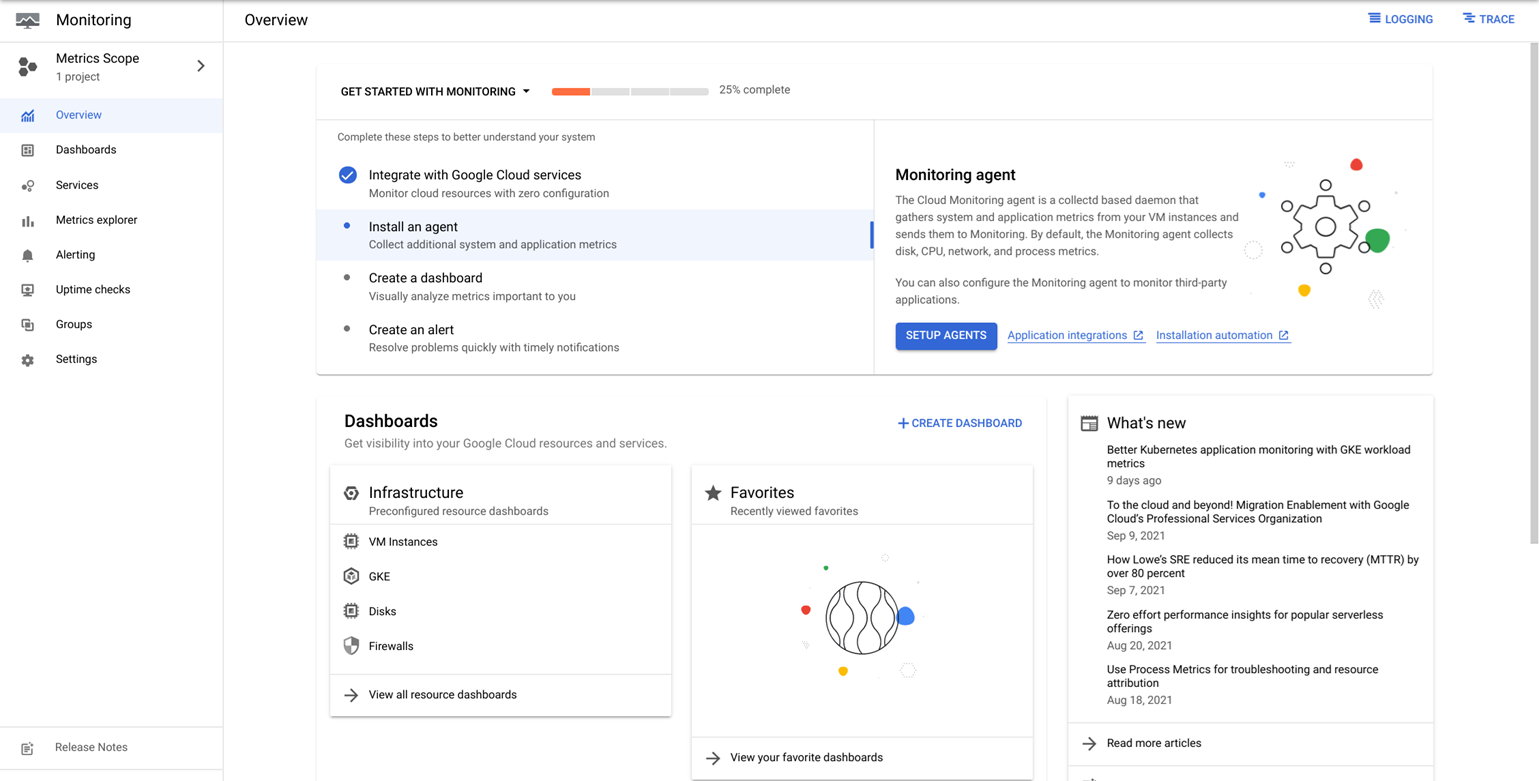
Metrics Explorer > under Resource & Metric click on SELECT A METRIC
5.Select Dataflow Job > Job You should see a list of available Dataflow-related metrics. Select Data watermark lag and 
click Apply.
6.Under metric, click on the Reset to remove the Data watermark lag metric. Select a new dataflow metric System lag.

**Note**: the metrics that Dataflow provides to Monitoring are listed here. You can 
search on the page for Dataflow. The metrics you have viewed are useful 
indicators of pipeline performance.
**Data watermark lag**: The age (time since event timestamp) of the most recent 
item of data that has been fully processed by the pipeline.
**System lag**: The current maximum duration that an item of data has been 
awaiting processing, in seconds

### Create alerts
If you want to be notified when a certain metric crosses a specified threshold (for 
example, when System Lag of our lab streaming pipeline increases above a predefined 
value), you could use the Alerting mechanisms of Monitoring to accomplish that. <br>
Create an alert <br>
1.On the Cloud Monitoring, click Alerting. <br>
2.Click + Create Policy. <br>
3.Click Add Condition. <br>
4.In the Target section, set the RESOURCE TYPE to Dataflow Job. <br>
5.Set the Metric to System Lag. <br>
6.Under Configuration set CONDITION to is above. <br>
7.Set THRESHOLD to 5. <br>
8.Set FOR to 1 minute. <br>
9.Click Add. <br>
10.Click Next. <br>
Add a notification <br>
11.Click on drop down arrow next to Notification Channels, then click on Manage  <br>
Notification Channels. <br>
A Notification channels page will open in new tab. <br>
12.Scroll down the page and click on ADD NEW for Email. <br>
13.In Create Email Channel dialog box, enter the Qwiklabs username as the Email  <br>
Address field and a Display name. <br>
14.Note: if you enter your own email address, you might get alerts until all the resources in 
the project have been deleted.Click Save. <br>
15.Go back to the previous Create alerting policy tab. <br>
16.Click on Notification Channels again, then click on the Refresh icon to get the 
display name you mentioned in the previous step. <br>
17.Now, select your Display name and click OK. <br>
18.Click Next. <br>
19.Set Alert name as MyAlertPolicy. <br>
20.Skip the Documentation step. <br>
21.Click Save. <br>

### Set up dashboards
You can easily build dashboards with the most 
relevant Dataflow-related charts with Cloud 
Monitoring Dashboards. <br>
1.In the left pane, click Dashboards. <br>
2.Click +Create Dashboard. <br>
3.For New Dashboard Name, type My Dashboard. <br>
4.Click Line Chart. <br>
5.Click on the dropdown box under Resource & 
Metric. <br>
6.Select Dataflow > Job > System Lag and 
click Apply. <br>
7.In the Filters panel, click + Add Filter. <br>
8.Select project_id in Label field, then select or 
type your GCP project ID in the Value field. <br>
9.Click Done. <br>
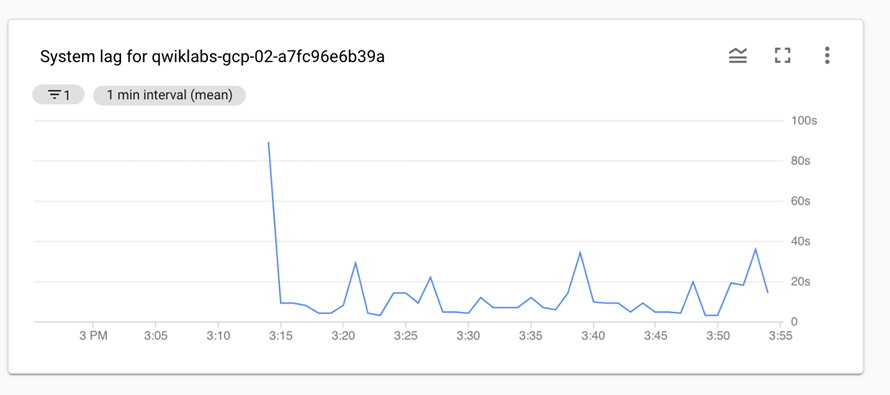
You can add more charts to the 
dashboard, if you would like, for 
example, Pub/Sub publish rates on the 
topic, or subscription backlog (which is 
a signal to the Dataflow auto-scaler). <br>

### Launch another streaming pipeline

✓ Interrupt first training-vm SSH terminal CRTL+C <br>
✓ cd ~/training-data-analyst/courses/streaming/publish 
./send_sensor_data.py --speedFactor=60 --project $DEVSHELL_PROJECT_ID <br>
✓ cd ~/training-dataanalyst/courses/streaming/process/sandiego/src/main/java/com/google/cloud/training/data 
analyst/sandiego
cat CurrentConditions.java <br>
✓ see code https://github.com/GoogleCloudPlatform/training-dataanalyst/blob/master/courses/streaming/process/sandiego/src/main/java/com/google/cloud/
training/dataanalyst/sandiego/CurrentConditions.java <br>
✓ In another training-vm SSH terminal
cd ~/training-data-analyst/courses/streaming/process/sandiego
./run_oncloud.sh $DEVSHELL_PROJECT_ID $BUCKET CurrentConditions <br>
✓ go to bigquery appear current_conditions table <br>